# TITANIC SURVIVAL PREDICTION

## Import Libraries

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset

In [35]:
df = pd.read_csv('Titanic-Dataset.csv')

In [36]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
print(f'Shape\t\t: {df.shape}')
print(f'Row Labels\t: {df.index}')
print(f'\nColumn Labels:\n {df.columns}')
print(f'\nColumn Data Types:\n {df.dtypes}')

Shape		: (891, 12)
Row Labels	: RangeIndex(start=0, stop=891, step=1)

Column Labels:
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Column Data Types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Detect Missing Values

In [39]:
# Missing values count for each column
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [40]:
missing_values = pd.DataFrame({
    "Missing Count": df.isna().sum(),
    "Missing %": (df.isna().sum() / len(df)) * 100
})
missing_values

,Missing Count,Missing %
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


In [41]:
# Replacing missing values under Age column with the median 
df['Age'] = df['Age'].fillna(df['Age'].median())

In [42]:
# Drop the Cabin column for data quality + model utility
df.drop('Cabin', axis=1, inplace=True)

In [43]:
# Replacing Missing values of Embarked with mode
df.fillna(df['Embarked'].mode()[0], inplace=True)

In [44]:
# Recheck the Values 
df.isna().sum(axis=0)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Feature Engineering

Titles like "Mr.", "Miss", "Dr." are present in the Name column. These can signal social status or gender—which affects the chances of survival.

In [45]:
# Extraction of Title
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


### The number of family members traveling with a passenger can be important for survival (group effect).

In [46]:
# Combination for family size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,1


### The survival pattern of people who travel alone can be different.

In [47]:
# Flagging (Binary indicators)
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,1,1


# Exploratory Data Analysis

In [48]:
## Check out the dataset
print(f'Shape of the dataset\t\t: {df.shape}')
print(f'\nColumns in the Data\n : {df.columns}')
print(f'\nData Types\n : {df.dtypes}')
print(f'\nOverview of the Data:\n {df.describe()}')
print(f'\nEmpty Data:\n {df.isna().sum().sort_values(ascending=False)}')

Shape of the dataset		: (891, 14)

Columns in the Data
 : Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Title', 'FamilySize',
       'IsAlone'],
      dtype='object')

Data Types
 : PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
Title           object
FamilySize       int64
IsAlone          int64
dtype: object

Overview of the Data:
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000  

## Univariate Analysis (Distribution)

### Goal: Spot skewness, outliers, dominant categories.

In [49]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

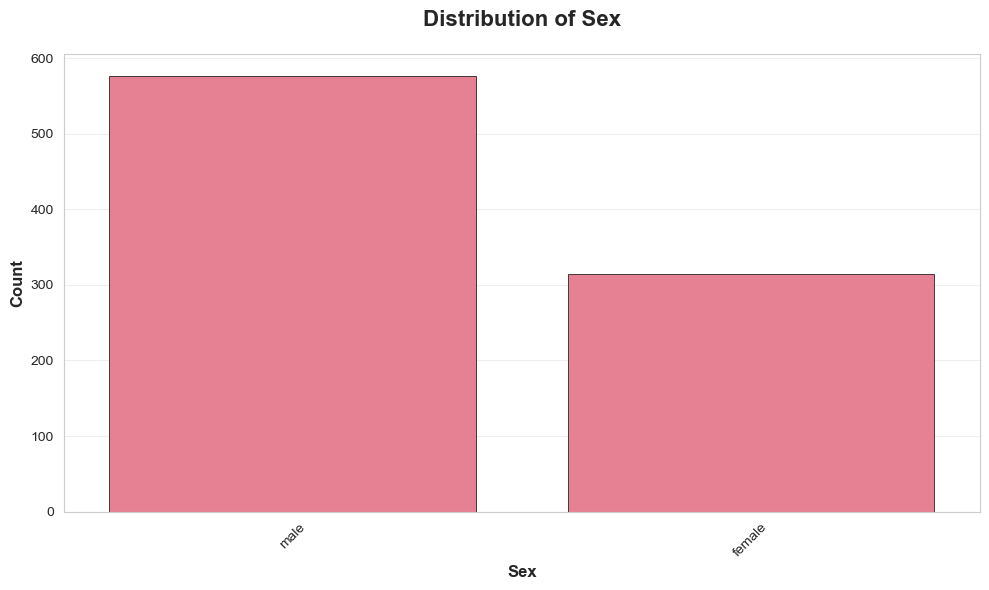

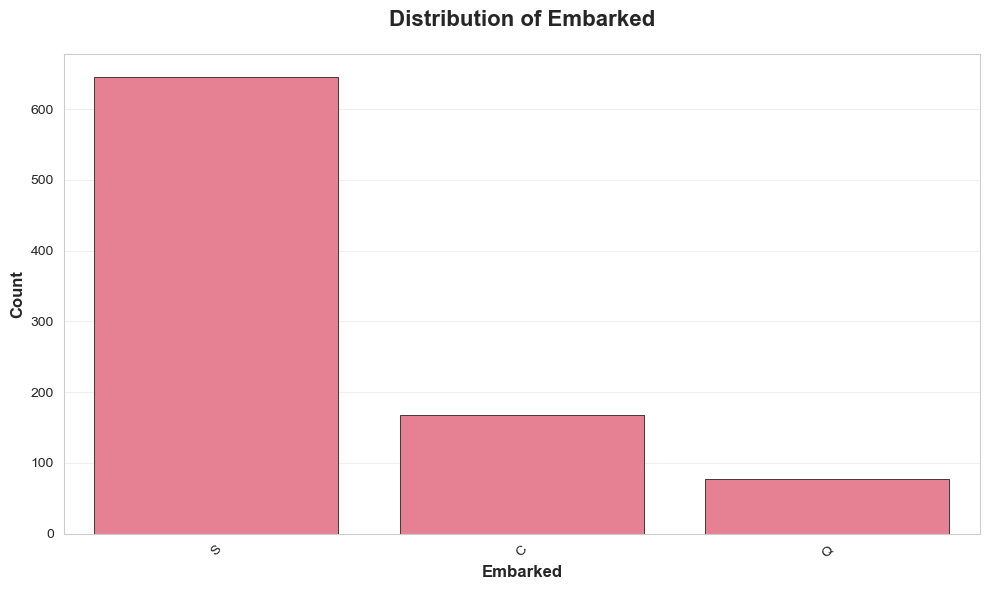

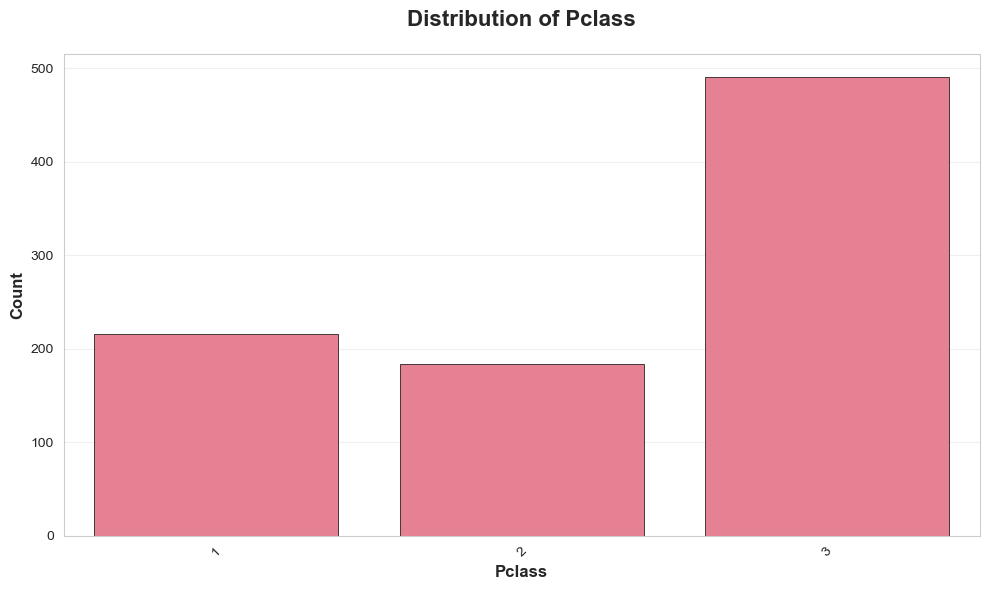

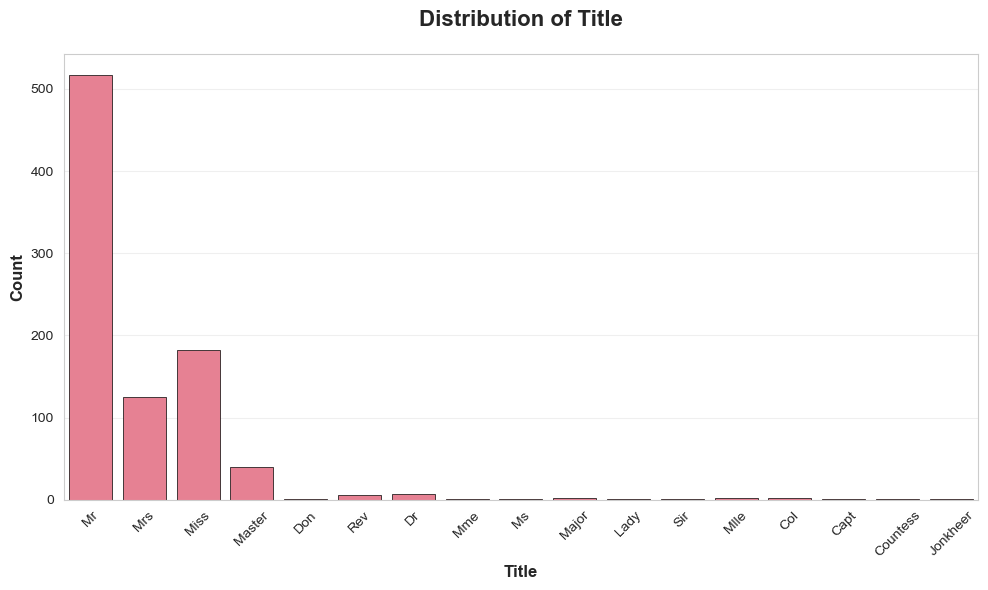

In [50]:
# Set a consistent style and palette for attractiveness
sns.set_style("whitegrid")
sns.set_palette("husl")

# Loop through the columns to create enhanced countplots
for col in ['Sex', 'Embarked', 'Pclass', 'Title']:
    plt.figure(figsize=(10, 6))  # Set a larger figure size for better visibility
    sns.countplot(x=col, data=df, edgecolor='black', linewidth=0.5)  # Add edges for definition
    
    # Customize title and labels
    plt.title(f'Distribution of {col}', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel(col, fontsize=12, fontweight='bold')
    plt.ylabel('Count', fontsize=12, fontweight='bold')
    
    # Rotate x-labels if needed (useful for longer labels like Embarked)
    plt.xticks(rotation=45)
    
    # Add a subtle grid for readability
    plt.grid(axis='y', alpha=0.3)
    
    # Tight layout to prevent clipping
    plt.tight_layout()
    plt.show()

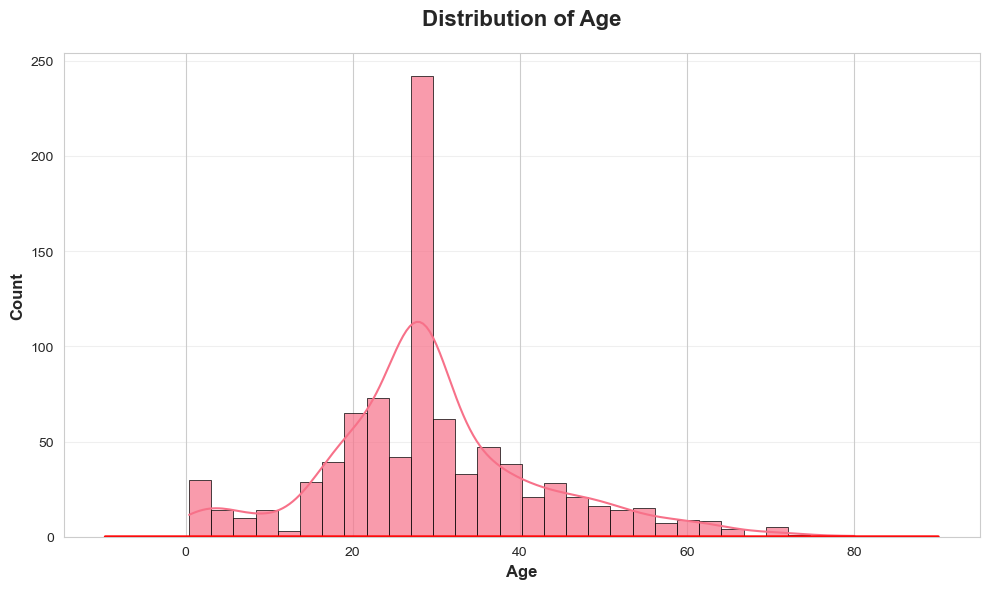

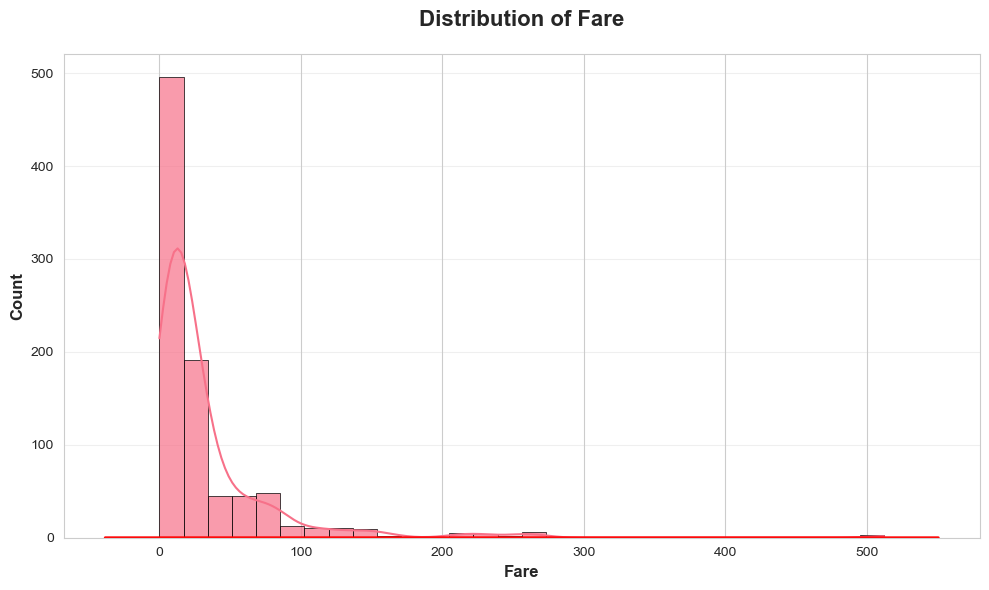

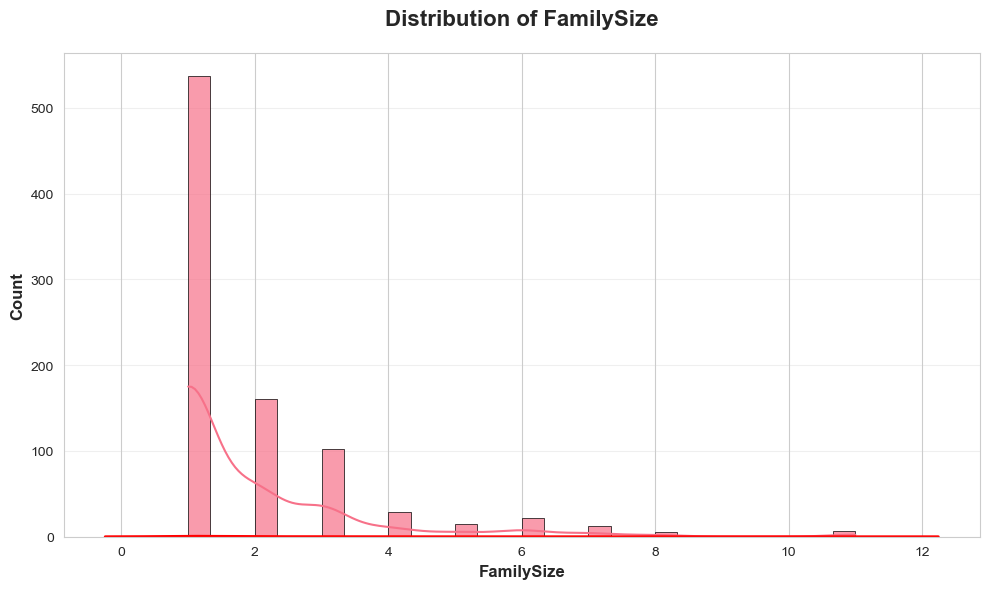

In [51]:
# Set a consistent style and palette for attractiveness
sns.set_style("whitegrid")
sns.set_palette("husl")

# Loop through the numerical columns to create enhanced histograms
num_cols = ['Age', 'Fare', 'FamilySize']
for col in num_cols:
    plt.figure(figsize=(10, 6))  # Set a larger figure size for better visibility
    sns.histplot(df[col], kde=True, bins=30, edgecolor='black', linewidth=0.5, alpha=0.7)  # Add edges and transparency for better visuals
    
    # Customize title and labels
    plt.title(f'Distribution of {col}', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel(col, fontsize=12, fontweight='bold')
    plt.ylabel('Count', fontsize=12, fontweight='bold')
    
    # Customize the KDE line for better appearance
    sns.kdeplot(df[col], color='red', linewidth=2)
    
    # Add a subtle grid for readability
    plt.grid(axis='y', alpha=0.3)
    
    # Tight layout to prevent clipping
    plt.tight_layout()
    plt.show()

## Bivariate Analysis (Survival vs Features)

### Goal: Identify predictive relationships

# Categorical VS Survived

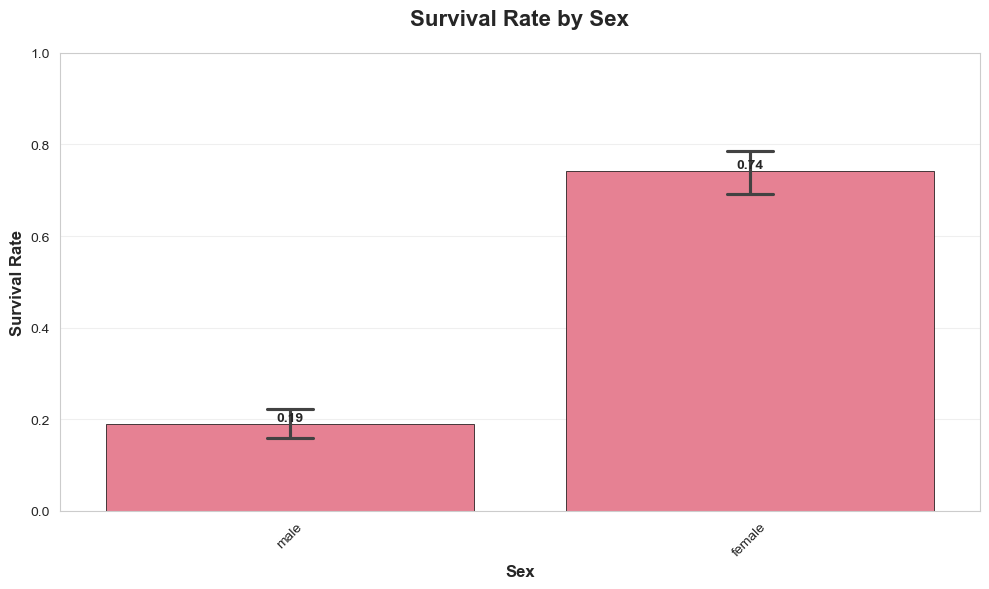

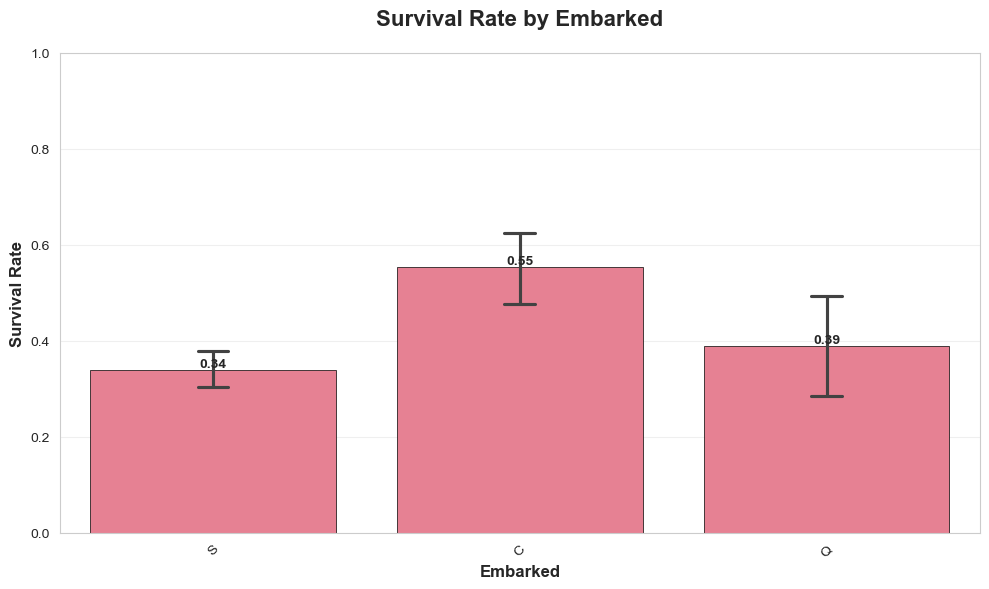

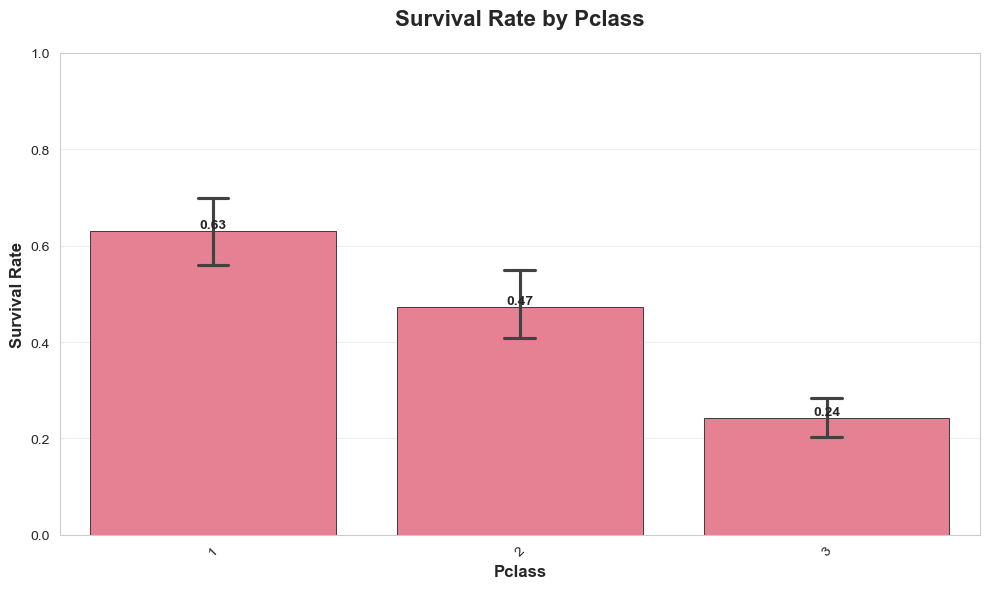

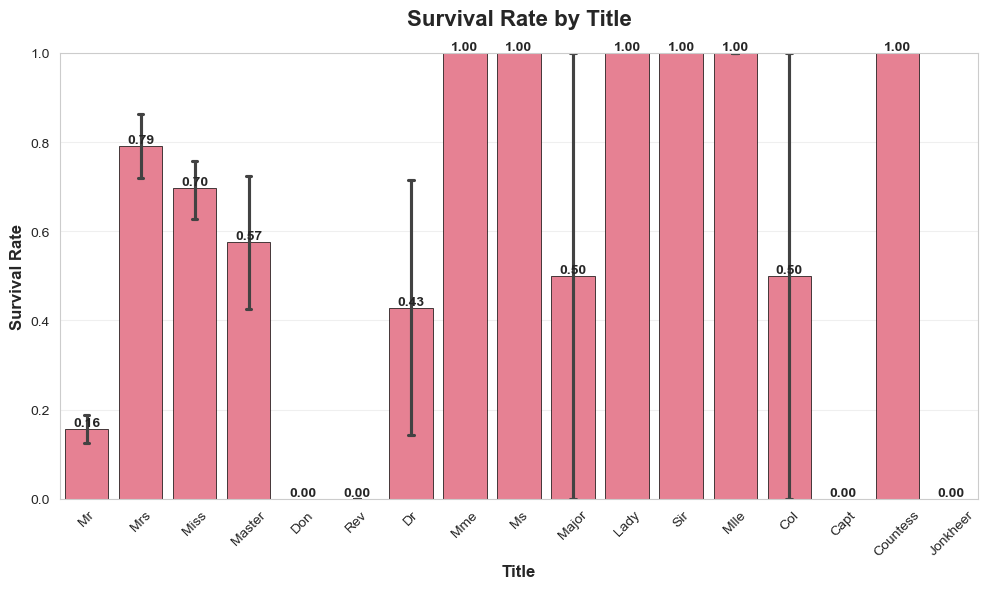

In [52]:
# Loop through the columns to create enhanced bar plots for survival rates
for col in ['Sex', 'Embarked', 'Pclass', 'Title']:
    plt.figure(figsize=(10, 6))  
    sns.barplot(x=col, y='Survived', data=df, edgecolor='black', linewidth=0.5, capsize=0.1)  # Add edges and error bars for confidence
    
    # Customize title and labels
    plt.title(f'Survival Rate by {col}', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel(col, fontsize=12, fontweight='bold')
    plt.ylabel('Survival Rate', fontsize=12, fontweight='bold')
    
    # Rotate x-labels if needed (useful for longer labels like Embarked or Title)
    plt.xticks(rotation=45)
    
    # Add value labels on top of bars for clarity
    for p in plt.gca().patches:
        plt.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    # Add a subtle grid for readability
    plt.grid(axis='y', alpha=0.3)
    
    # Set y-axis limits for better visualization (0 to 1 for survival rate)
    plt.ylim(0, 1)
    
    # Tight layout to prevent clipping
    plt.tight_layout()
    plt.show()

# Numerical VS Survived

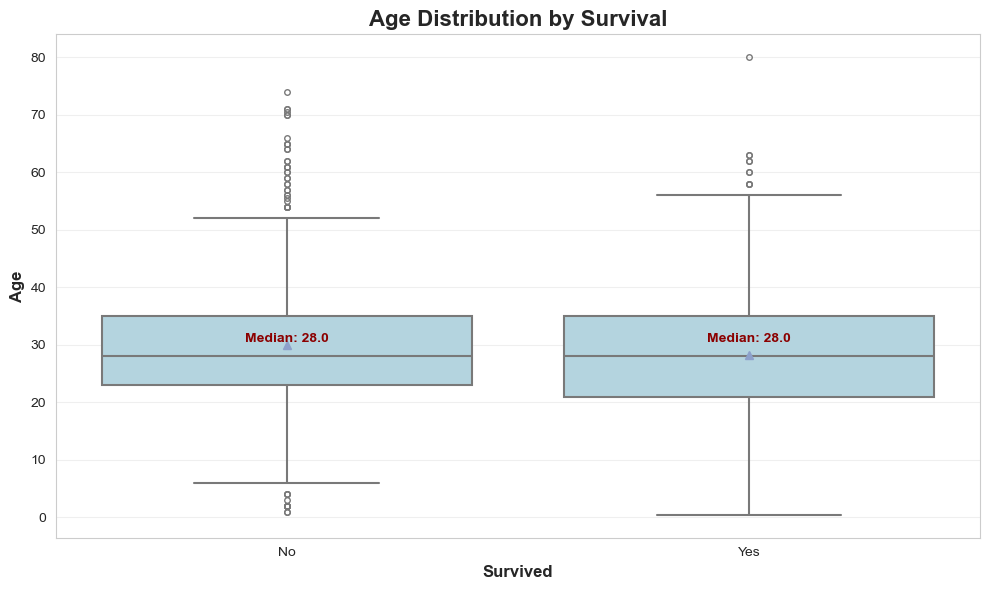

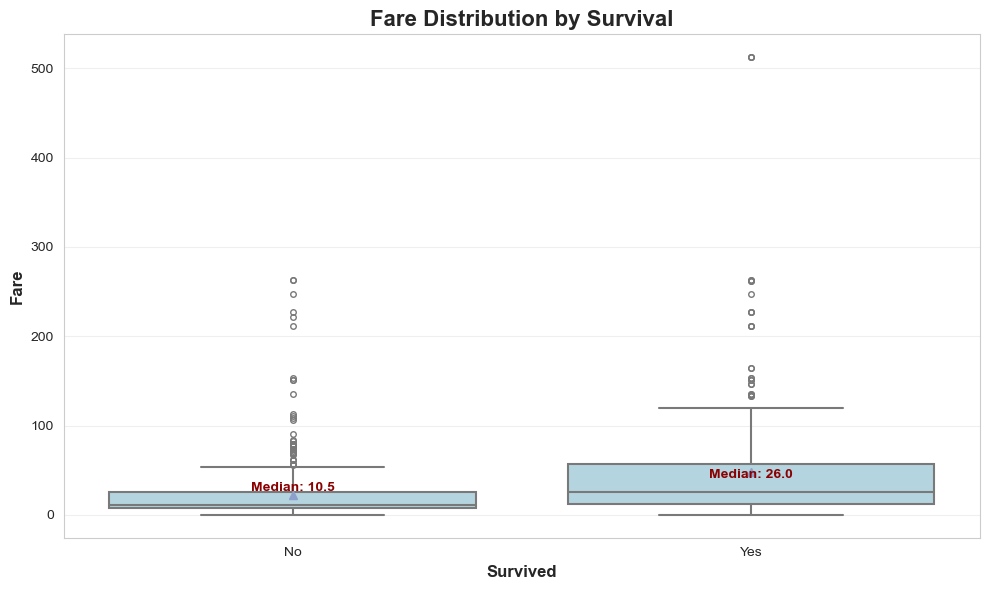

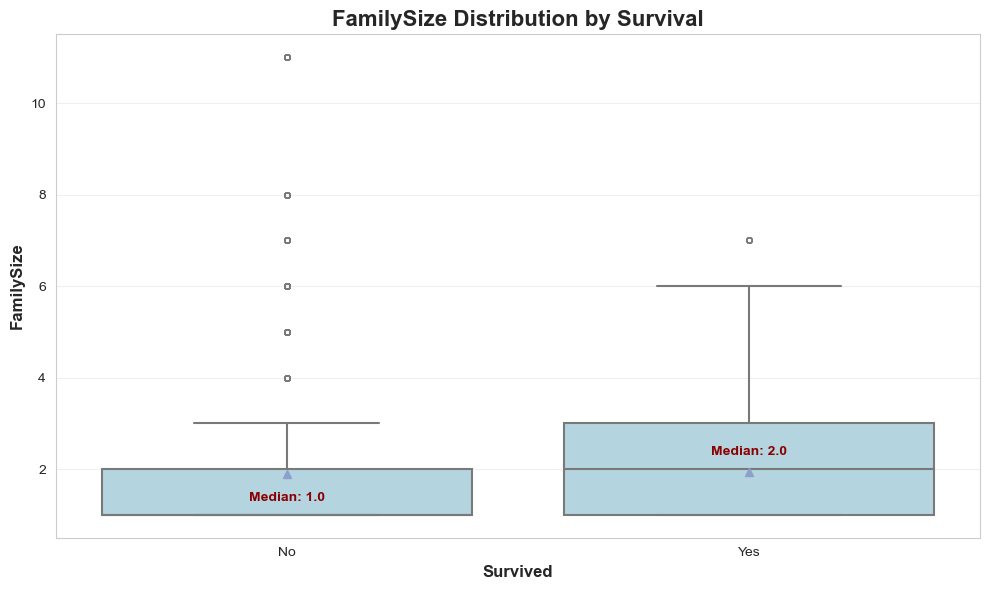

In [53]:
# Set a clean style and palette
sns.set_style("whitegrid")
sns.set_palette("Set2")

num_cols = ['Age', 'Fare', 'FamilySize']

for col in num_cols:
    plt.figure(figsize=(10, 6))
    
    # Simplified boxplot with mean line and subtle styling
    ax = sns.boxplot(x='Survived', y=col, data=df,
                     color='lightblue', linewidth=1.5,
                     showmeans=True, meanprops={'color':'red', 'linewidth':2},
                     fliersize=4)
    
    # Title and axis labels
    plt.title(f'{col} Distribution by Survival', fontsize=16, fontweight='bold')
    plt.xlabel('Survived', fontsize=12, fontweight='bold')
    plt.ylabel(col, fontsize=12, fontweight='bold')
    plt.xticks([0,1], ['No','Yes'])
    
    # Annotate medians
    medians = df.groupby('Survived')[col].median()
    for i, median in enumerate(medians):
        ax.annotate(f'Median: {median:.1f}', xy=(i, median), xytext=(0,8),
                    textcoords='offset points', ha='center', va='bottom',
                    fontsize=10, fontweight='bold', color='darkred')
    
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()


# Multivariate Analysis

In [54]:
pd.crosstab(df['Sex'], df['Pclass'], values=df['Survived'], 
            aggfunc='mean').style.background_gradient(cmap='coolwarm')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


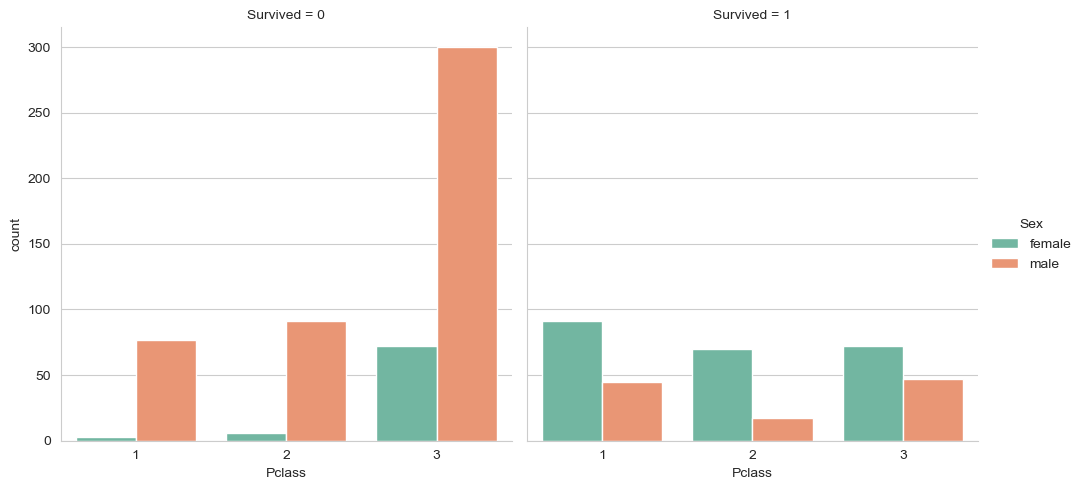

In [55]:
sns.catplot(x='Pclass', hue='Sex', col='Survived', data=df, kind='count')

# Correlation & Feature Relationships

### Goal: Spot linear relationships, multicollinearity

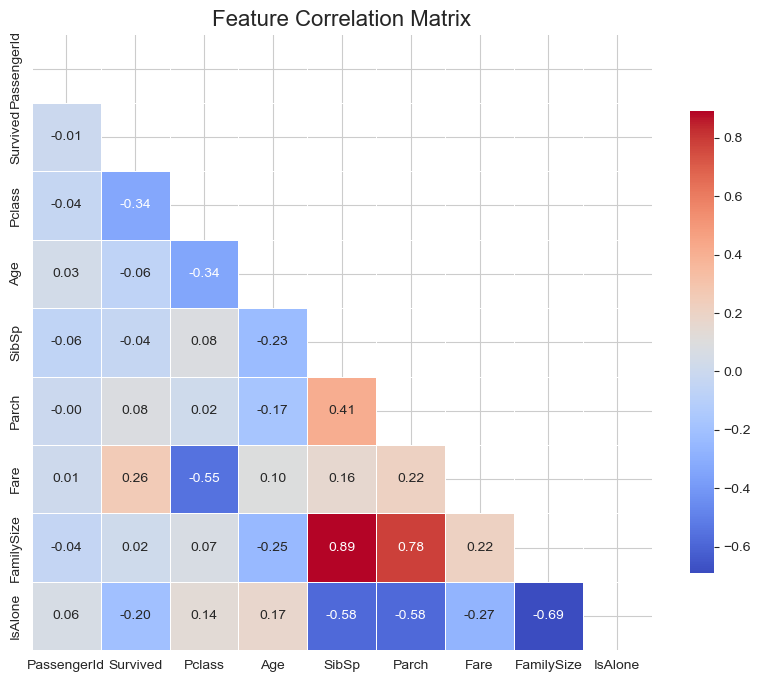

In [56]:
# 1. Calculate the correlation matrix
corr = df.corr(numeric_only=True) # Use numeric_only=True for robustness against non-numeric columns

# 2. Set figure size for better readability
plt.figure(figsize=(10, 8)) 

# 3. Create a mask to hide the upper triangle (since the matrix is symmetric)
mask = np.triu(np.ones_like(corr, dtype=bool)) 

# 4. Generate the heatmap with improvements
sns.heatmap(
    corr, 
    mask=mask,               # Apply the mask
    annot=True,              # Show correlation values
    cmap='coolwarm',         # Colormap
    fmt=".2f",               # Format to 2 decimal places
    linewidths=.5,           # Add lines between cells
    cbar_kws={"shrink": .75} # Adjust the size of the color bar
)

# 5. Add a professional title and display
plt.title('Feature Correlation Matrix', fontsize=16)
plt.show()

# Optional: To save the figure
# plt.savefig('correlation_heatmap.png', bbox_inches='tight')

<Figure size 1000x1000 with 0 Axes>

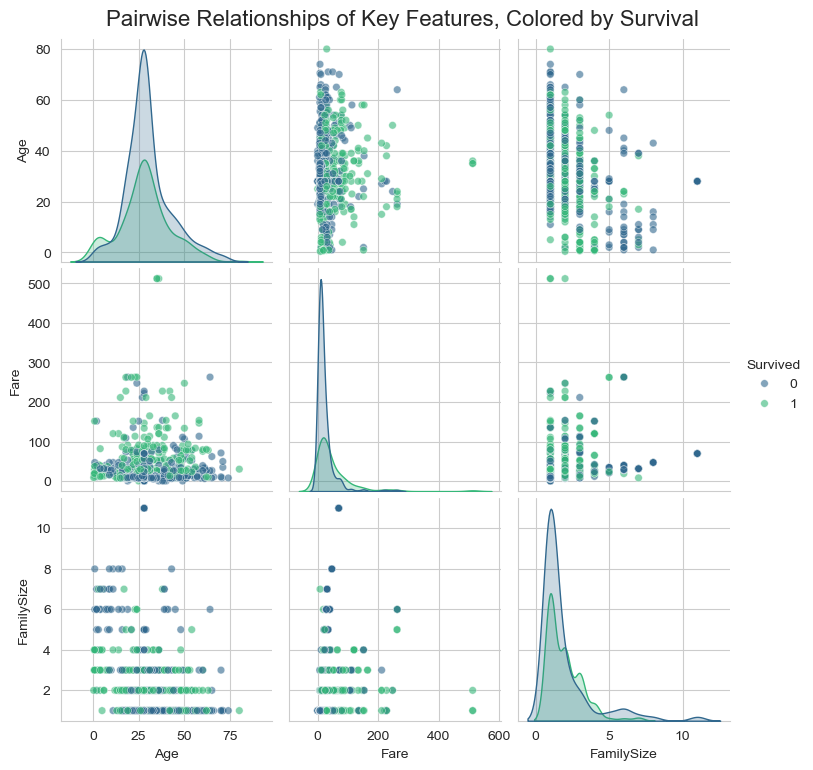

In [57]:
# 1. Define variables and settings
cols_to_plot = ['Survived', 'Age', 'Fare', 'FamilySize']
hue_var = 'Survived'

# 2. Set the figure size using a custom parameter to make dots clearer
plt.figure(figsize=(10, 10)) 

# 3. Generate the pairplot with enhancements
g = sns.pairplot(
    data=df[cols_to_plot].dropna(), # Drop NaNs only for the columns being plotted for robustness
    vars=[c for c in cols_to_plot if c != hue_var], # Plot only the continuous variables
    hue=hue_var,
    diag_kind='kde',                 # Use Kernel Density Estimate for diagonal (smoother)
    palette='viridis',               # Use a different, often better, color palette
    plot_kws={'alpha': 0.6, 's': 30}, # Adjust transparency and size of scatter points
    height=2.5                       # Control the size of each subplot
)

# 4. Add a title for context
g.fig.suptitle('Pairwise Relationships of Key Features, Colored by Survival', 
               y=1.02, fontsize=16)
plt.show()


# 🔎 Exploratory Data Analysis – Key Insights

#### 1. Univariate Analysis

- Age: Most passengers were between 20–40 years; slight right skew.

- Fare: Highly skewed with a few very high outliers.

- FamilySize: Majority traveled alone (FamilySize = 1).

#### 2. Categorical Features & Survival

- Sex: Strong effect — females had a much higher survival rate than males.

- Pclass: 1st class had the highest survival, 3rd class the lowest.

- Embarked: Passengers embarked from Cherbourg (C) had higher survival.

- Title: Titles like Mrs, Miss were associated with higher survival; Mr the lowest.

#### 3. Numerical Features & Survival

- Survivors were generally younger.

- Survivors paid higher fares.

- Larger families had mixed chances, but being alone reduced survival odds.

#### 4. Multivariate Patterns

- Sex + Pclass: Females in 1st and 2nd class had the best survival rates; males in 3rd class the worst.

- Cross-tab heatmaps highlighted combined effects (e.g., male + 3rd class ≈ very low survival).

#### 5. Correlation Analysis

- Fare and Pclass were negatively correlated (higher class → higher fare).

- FamilySize and IsAlone are strongly correlated (engineered features).

- No serious multicollinearity issues, but related engineered variables need careful selection in modeling.

# Model Building & Training

## Machine Learning Model

### Preprocessing

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Drop irrelevant columns (Cabin already dropped earlier)
df_model = df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

# Encode categorical variables
df_model['Sex'] = LabelEncoder().fit_transform(df_model['Sex'])
df_model['Embarked'] = LabelEncoder().fit_transform(df_model['Embarked'])
df_model['Title'] = LabelEncoder().fit_transform(df_model['Title'])

# Features and Target
X = df_model.drop('Survived', axis=1)
y = df_model['Survived']

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (712, 10)
Testing set size: (179, 10)


### Model Loop

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Dictionary of models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100)
}

results = {}

# Train + Evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    
    print(f"==== {name} ====")
    print("Accuracy:", round(acc, 4))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")

# Compare model accuracies
print("Model Performance Comparison:")
for name, acc in results.items():
    print(f"{name}: {acc:.4f}")

==== Logistic Regression ====
Accuracy: 0.8156
Confusion Matrix:
 [[99 11]
 [22 47]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86       110
           1       0.81      0.68      0.74        69

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.82      0.82      0.81       179



==== Decision Tree ====
Accuracy: 0.7989
Confusion Matrix:
 [[93 17]
 [19 50]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       110
           1       0.75      0.72      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



==== Random Forest ====
Accuracy: 0.8324
Confusion Matrix:
 [[97 13]
 [17 52]]
Classification Report:
               precision    

### Visual Comparison

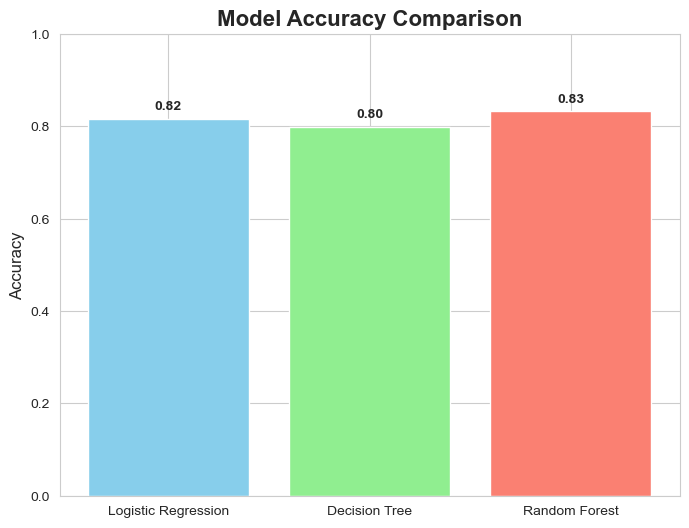

In [60]:
# 📊 Visualize Model Accuracies
plt.figure(figsize=(8,6))
plt.bar(results.keys(), results.values(), color=['skyblue','lightgreen','salmon'])
plt.title("Model Accuracy Comparison", fontsize=16, fontweight="bold")
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0,1)
for i, v in enumerate(results.values()):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=10, fontweight='bold')
plt.show()

# 📌 Conclusion
In this project, we developed machine learning models to predict passenger survival on the Titanic dataset.

- We explored Logistic Regression, Decision Tree, and Random Forest.
- Logistic Regression and Random Forest generally performed well, while Decision Tree tended to overfit.
- Gender, Passenger Class, and Fare emerged as strong predictors of survival.
- Female passengers and those in higher classes (Pclass 1) had significantly better survival rates.

Key Learning:
This task provided experience in data cleaning, feature engineering, exploratory analysis, 
model training, evaluation, and comparison. It highlighted the importance of preprocessing 
and model selection in building reliable predictive systems.


# 📌 Future Work
1. Hyperparameter Tuning:
   - Use GridSearchCV or RandomizedSearchCV to optimize Decision Tree and Random Forest.
   - This could improve generalization and prevent overfitting.

2. Cross-Validation:
   - Apply k-fold cross-validation for more reliable performance estimation.

3. Additional Models:
   - Try Support Vector Machine (SVM) and K-Nearest Neighbors (KNN) for comparison.

4. Feature Scaling & Engineering:
   - Normalize/standardize features like Age and Fare.
   - Create interaction features (e.g., Age*Pclass).

5. Larger Datasets:
   - Apply similar approaches on larger, more complex datasets to evaluate scalability.